In [1]:
import xarray as xr
import numpy as np
from matplotlib import colors, cm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ssp_colors = {"evaluation":"k",
              "historical":"grey",
              "ssp585":(149/255,27/255,30/255),
              "ssp370":(231/255,29/255,37/255),
              "ssp245":(247/255,148/255,32/255),
              "ssp126":(23/255,60/255,102/255),
              "ssp119":(0/255,173/255,207/255),}

In [3]:
list_evaluation = ['evaluation_BARRA-R_r1i1p1f1',
                   # 'evaluation_ERA5_r1i1p1f1',
                  ]

list_historical = ['historical_ACCESS-CM2_r4i1p1f1', 
                   'historical_ACCESS-ESM1-5_r6i1p1f1',
                   'historical_CESM2_r11i1p1f1', 
                   'historical_CMCC-ESM2_r1i1p1f1',
                   'historical_EC-Earth3_r1i1p1f1',
                   # 'historical_MPI-ESM1-2-HR_r1i1p1f1',
                   'historical_NorESM2-MM_r1i1p1f1',
                  ]

list_ssp126 = [
                 # 'ssp126_ACCESS-CM2_r4i1p1f1', # need to fix this one
                 'ssp126_ACCESS-ESM1-5_r6i1p1f1',
                 'ssp126_CESM2_r11i1p1f1',
                 'ssp126_CMCC-ESM2_r1i1p1f1',
                 'ssp126_EC-Earth3_r1i1p1f1',
                 # 'ssp126_MPI-ESM1-2-HR_r1i1p1f1',
                 'ssp126_NorESM2-MM_r1i1p1f1',
              ]

list_ssp370 = ['ssp370_ACCESS-CM2_r4i1p1f1',
                 'ssp370_ACCESS-ESM1-5_r6i1p1f1',
                 'ssp370_CESM2_r11i1p1f1',
                 'ssp370_CMCC-ESM2_r1i1p1f1',
                 'ssp370_EC-Earth3_r1i1p1f1',
                 # 'ssp370_MPI-ESM1-2-HR_r1i1p1f1',
                 'ssp370_NorESM2-MM_r1i1p1f1',
              ]

list_ssp585 = ['ssp585_ACCESS-CM2_r4i1p1f1',
                 'ssp585_EC-Earth3_r1i1p1f1']

list_future = list_ssp126 + list_ssp370 + list_ssp585

In [4]:
turbulence_index = "windspeed"
ds = xr.open_dataset("/home/563/gt3409/turbulence_AUSCAT/windspeed-freq-above-p99_AUS-15_BOM_BARPA-R_v1-r1_6hr_ann.nc")
ds

<xarray.Dataset> Size: 28kB
Dimensions:    (run: 24, time: 122)
Coordinates:
  * time       (time) float64 976B 1.979e+03 1.98e+03 ... 2.099e+03 2.1e+03
    pressure   int64 8B ...
  * run        (run) <U33 3kB 'evaluation_BARRA-R_r1i1p1f1' ... 'ssp585_EC-Ea...
Data variables:
    windspeed  (run, time) float64 23kB ...

In [16]:
df = ds.sel(run = ['evaluation_BARRA-R_r1i1p1f1', 'evaluation_ERA5_r1i1p1f1',] + 
               list_historical + 
               list_ssp126 + 
               list_ssp370 +
               list_ssp585).to_dataframe()["windspeed"].reset_index()
df["experiment"] = [x.split("_")[0] for x in df["run"]]

for window_size in [5,10,20]:
    df[f"rolling_{window_size}y"] = df["windspeed"].rolling(window=window_size,).mean()


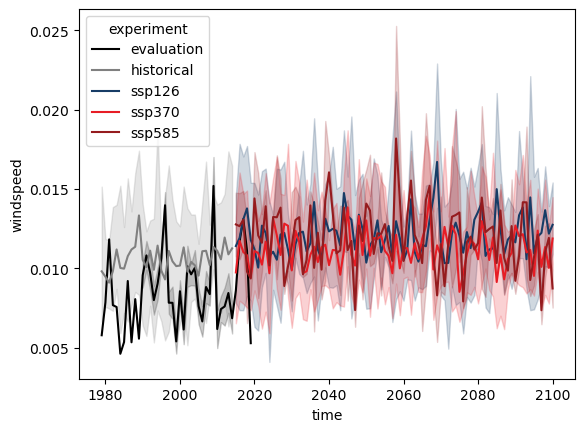

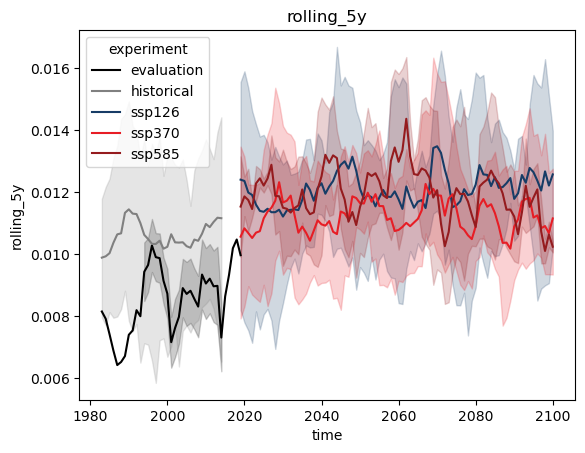

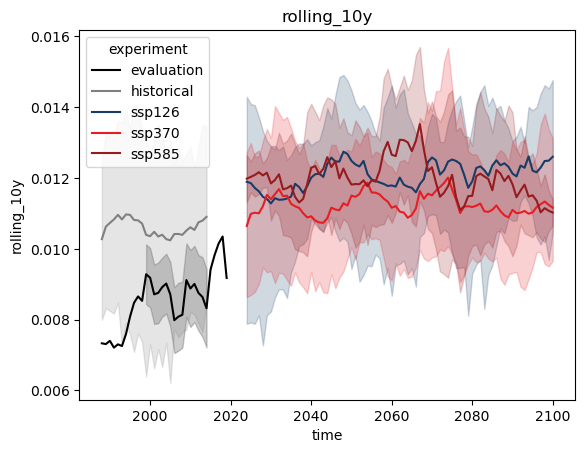

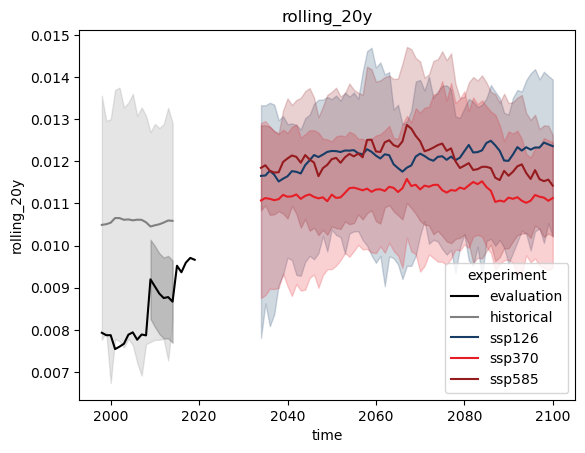

In [18]:
sns.lineplot(df, x="time", y="windspeed", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)

for window_size in [5,10,20]:
    plt.figure()
    sns.lineplot(df, x="time", y=f"rolling_{window_size}y", hue="experiment", errorbar=('ci', 100), palette=ssp_colors,)
    plt.title( f"rolling_{window_size}y")

<Axes: xlabel='time', ylabel='rolling_5y'>

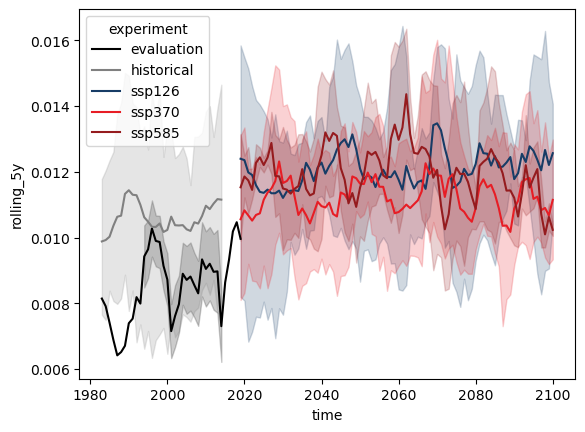

In [6]:
sns.lineplot(df, x="time", y="rolling_5y", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)

<Axes: xlabel='time', ylabel='rolling_5y'>

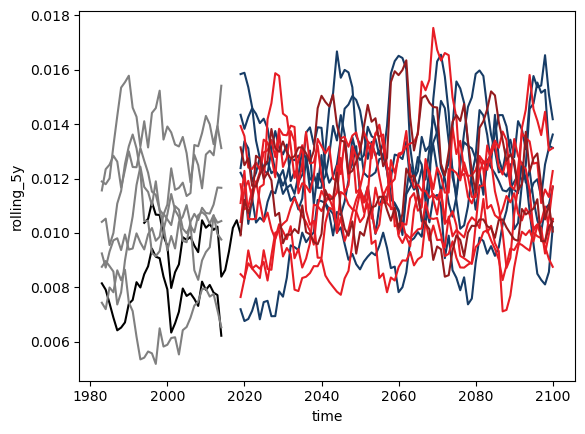

In [7]:
sns.lineplot(df,
             x="time",
             y="rolling_5y", 
             hue="run", 
             errorbar=('ci', 100),
             palette=[ssp_colors[experiment] for experiment in  df.groupby("run").max()["experiment"]],
             estimator=None,
            legend=False)

<Axes: xlabel='time', ylabel='windspeed'>

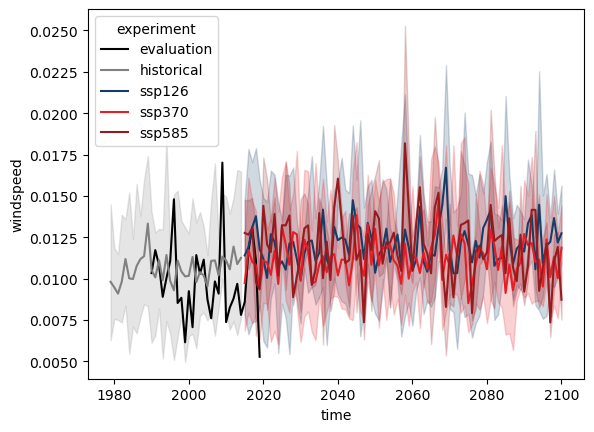

In [9]:

list_future = list_ssp126 + list_ssp370 + list_ssp585

df = ds.sel(run = ['evaluation_BARRA-R_r1i1p1f1'] +
               list_historical + 
               list_ssp126 + 
               list_ssp370 +
               list_ssp585).to_dataframe()["windspeed"].reset_index()

window_size = 5
df["rolling_5y"] = df["windspeed"].rolling(window=window_size,).mean()

df["experiment"] = [x.split("_")[0] for x in df["run"]]

sns.lineplot(df, x="time", y="windspeed", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)

<Axes: xlabel='time', ylabel='rolling_5y'>

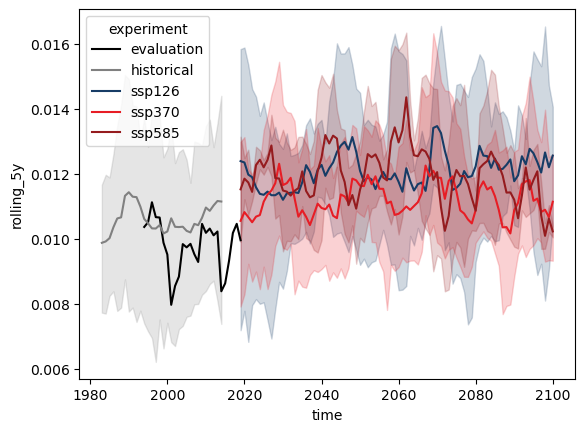

In [10]:
sns.lineplot(df, x="time", y="rolling_5y", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)

<Axes: xlabel='time', ylabel='windspeed'>

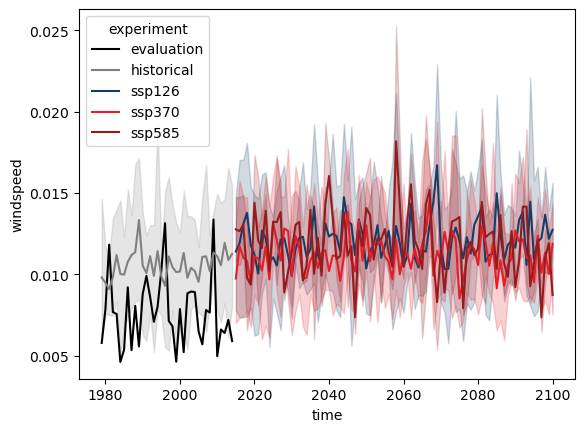

In [11]:
df = ds.sel(run = ['evaluation_ERA5_r1i1p1f1',] + 
               list_historical + 
               list_ssp126 + 
               list_ssp370 +
               list_ssp585).to_dataframe()["windspeed"].reset_index()

window_size = 5
df["rolling_5y"] = df["windspeed"].rolling(window=window_size,).mean()

df["experiment"] = [x.split("_")[0] for x in df["run"]]

sns.lineplot(df, x="time", y="windspeed", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)

<Axes: xlabel='time', ylabel='rolling_5y'>

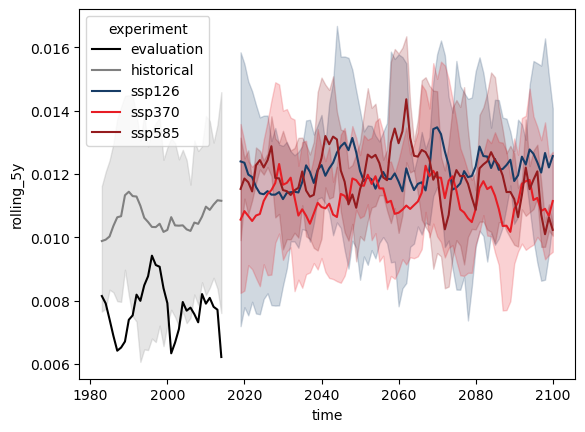

In [12]:
sns.lineplot(df, x="time", y="rolling_5y", hue="experiment", errorbar=('ci', 100), palette=ssp_colors)